## Part i

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
dataset = pd.read_csv("boston.csv")

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [4]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [5]:
X_df,Y_df = dataset.iloc[:,:-1],dataset.iloc[:,-1]

In [6]:
X_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [7]:
Y_df.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200001
75%       25.000000
max       50.000000
Name: MV, dtype: float64

In [8]:
normalize = lambda x: (x-x.min())/(x.max()-x.min())

In [9]:
X_df=X_df.apply(normalize,axis=0)

In [10]:
X_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
X,Y = X_df.values,Y_df.values
Y=Y.reshape((Y.shape[0],1))

In [12]:
def rmse(X,Y,theta):
    return np.sqrt(np.sum(np.square(np.dot(X,theta)-Y))/(2*Y.shape[0])) 

In [13]:
def gradient_descent(X,Y, theta, learning_rate, epochs,validation_X,validation_Y):
    rmse_history_train = []
    rmse_history_validation = []
    while epochs>0:
        rmse_history_train.append(rmse(X,Y,theta)) 
        rmse_history_validation.append(rmse(validation_X,validation_Y,theta))
        gradient = np.dot(np.transpose(X),(np.dot(X,theta)-Y))/Y.shape[0]
        theta = theta-(learning_rate*gradient)
        epochs-=1
    print("gradient descent done")
    return theta,rmse_history_train,rmse_history_validation

In [14]:
learning_rate = 0.0001
number_of_features = X.shape[1]
epochs = 10000

In [15]:
X = np.hstack((np.ones((X.shape[0],1)),X))

In [16]:
kf = KFold(n_splits=5)
count = 1
rmse_fold_history_train = []
rmse_fold_history_validation = []
min_rmse_fold = float('Inf')
best_fold_train_index = 0
best_fold_validation_index=0

In [17]:
for train_index,test_index in kf.split(X):
    print("Fold number {}".format(count))
    count+=1
    X_train = X[train_index]
    Y_train = Y[train_index]
    X_validation = X[test_index]
    Y_validation = Y[test_index]
    theta = np.ones((number_of_features+1,1)) #one extra element for theta intercept    
    theta,rmse_history_train,rmse_history_validation = gradient_descent(X_train,Y_train,theta,learning_rate,epochs,X_validation,Y_validation)
    rmse_fold_history_train.append(rmse_history_train)            
    rmse_fold_history_validation.append(rmse_history_validation)
    
    if rmse_history_validation[-1] < min_rmse_fold:
        min_rmse_fold = rmse_history_validation[-1]
        best_fold_train_index = train_index
        best_fold_validation_index=test_index
    

Fold number 1
gradient descent done
Fold number 2
gradient descent done
Fold number 3
gradient descent done
Fold number 4
gradient descent done
Fold number 5
gradient descent done


In [18]:
rmse_fold_history_train = np.matrix(rmse_fold_history_train)
rmse_fold_history_validation = np.matrix(rmse_fold_history_validation)

In [19]:
mean_rmse_train = rmse_fold_history_train.mean(0)
std_rmse_train = rmse_fold_history_train.std(0)

mean_rmse_validation = rmse_fold_history_validation.mean(0)
std_rmse_validation = rmse_fold_history_validation.std(0)

In [20]:
def plot_mean_rmse_iteration(title, data,error):
    data= np.array(data)
    error = np.array(error)
    plt.ylabel('RMSE')
    plt.xlabel("Number of iteration")
    plt.title(title)
    plt.plot([i for i in range(len(data))], data, 'k', color='#CC4F1B')
    plt.fill_between([i for i in range(len(data))], data-error, data+error,alpha=0.2, edgecolor='#CC4F1B', facecolor='#FF9848')

### Part a

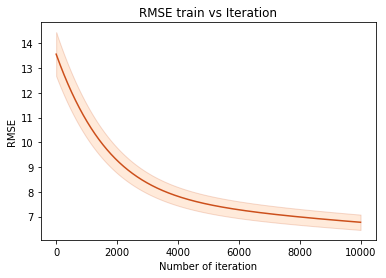

In [21]:
plot_mean_rmse_iteration("RMSE train vs Iteration", mean_rmse_train.tolist()[0],std_rmse_train.tolist()[0])

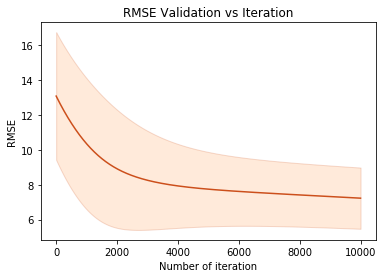

In [22]:
plot_mean_rmse_iteration("RMSE Validation vs Iteration", mean_rmse_validation.tolist()[0],std_rmse_validation.tolist()[0])

### Part b

In [23]:
train_rmse_of_5_folds = rmse_fold_history_train[:,-1]
validation_rmse_of_5_folds = rmse_fold_history_validation[:,-1]

In [24]:
train_rmse_of_5_folds

matrix([[7.23952174],
        [6.68748314],
        [6.34400462],
        [6.60777458],
        [6.97458909]])

In [25]:
validation_rmse_of_5_folds

matrix([[ 4.59167776],
        [ 7.46397876],
        [10.04884293],
        [ 7.44348269],
        [ 6.58135478]])

In [26]:
mean_rmse_train = np.mean(train_rmse_of_5_folds)
std_rmse_train = np.std(train_rmse_of_5_folds)

In [27]:
print("{0:.2f} ± {1:.2f}".format(mean_rmse_train,std_rmse_train))

6.77 ± 0.31


In [28]:
mean_rmsE_vali = validation_rmse_of_5_folds.mean()
std_rmse_vali = validation_rmse_of_5_folds.std()

In [29]:
print("{0:.2f} ± {1:.2f}".format(mean_rmsE_vali,std_rmse_vali))

7.23 ± 1.76


## Part ii

In [30]:
new_X_train,new_Y_train = X[best_fold_train_index],Y[best_fold_train_index]
new_X_test,new_Y_test = X[best_fold_validation_index],Y[best_fold_validation_index]

In [31]:
new_X_train.shape,new_Y_train.shape,new_X_test.shape,new_Y_test.shape

((404, 14), (404, 1), (102, 14), (102, 1))

In [32]:
parameters = {'alpha':[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]}

### Part a

In [33]:
ridge_model = Ridge(fit_intercept=False)

In [34]:
grid_ridge = GridSearchCV(estimator=ridge_model, param_grid=parameters,cv=5,verbose=1)

In [35]:
grid_ridge.fit(new_X_train,new_Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [36]:
alpha_ridge = grid_ridge.best_estimator_.alpha
alpha_ridge

3.0

In [37]:
rmse_history = []
number_of_itr = 300

In [38]:
for itr in range(1,number_of_itr+1):
    print(itr,end='\r')
    rm = Ridge(alpha=alpha_ridge,fit_intercept=False,max_iter=itr)
    rm.fit(new_X_train,new_Y_train)
    pred = rm.predict(new_X_train)
    
    rmse_history.append(sqrt(mean_squared_error(new_Y_train, pred)))

5.26457478718326 5.26457478718326 5.26457478718326 5.26457478718326


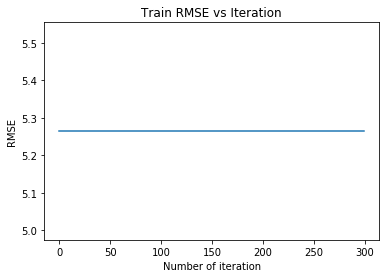

In [39]:
plt.ylabel('RMSE')
plt.xlabel("Number of iteration")
plt.title("Train RMSE vs Iteration")
plt.plot(range(len(rmse_history)),rmse_history)
print(min(rmse_history[:50]),min(rmse_history[:100]),min(rmse_history[:200]),min(rmse_history))

In [298]:
ridge_model = Ridge(alpha=alpha_ridge,fit_intercept=False)

In [299]:
ridge_model.fit(new_X_train,new_Y_train)

Ridge(alpha=3.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [300]:
train_pred = ridge_model.predict(new_X_train)
test_pred = ridge_model.predict(new_X_test)

In [301]:
train_rmse = sqrt(mean_squared_error(new_Y_train, train_pred))
train_rmse

5.26457478718326

In [302]:
test_rmse = sqrt(mean_squared_error(new_Y_test, test_pred))
test_rmse

3.143437256620382

### Part b

In [40]:
lasso_model = Lasso(fit_intercept=False)

In [41]:
grid_lasso = GridSearchCV(estimator=lasso_model, param_grid=parameters,cv=5,verbose=1)

In [42]:
grid_lasso.fit(new_X_train,new_Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [43]:
alpha_lasso = grid_lasso.best_estimator_.alpha
alpha_lasso

1.0

In [44]:
rmse_history = []
number_of_itr = 300

In [45]:
for itr in range(1,number_of_itr+1):
    print(itr,end='\r')
    rm = Lasso(alpha=alpha_lasso,fit_intercept=False,max_iter=itr)
    rm.fit(new_X_train,new_Y_train)
    pred = rm.predict(new_X_train)
    
    rmse_history.append(sqrt(mean_squared_error(new_Y_train, pred)))

/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


7.6319221861154 7.605515393285675 7.605515393285675 7.605515393285675


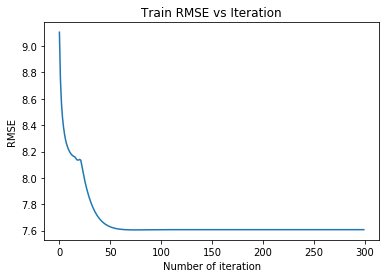

In [46]:
plt.ylabel('RMSE')
plt.xlabel("Number of iteration")
plt.title("Train RMSE vs Iteration")
plt.plot(range(len(rmse_history)),rmse_history)
print(min(rmse_history[:50]),min(rmse_history[:100]),min(rmse_history[:200]),min(rmse_history))

In [316]:
lasso_model = Lasso(alpha=alpha_lasso,fit_intercept=False)

In [317]:
lasso_model.fit(new_X_train,new_Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [318]:
train_pred = lasso_model.predict(new_X_train)
test_pred = lasso_model.predict(new_X_test)

In [319]:
train_rmse = sqrt(mean_squared_error(new_Y_train, train_pred))
train_rmse

7.607429679597901

In [320]:
test_rmse = sqrt(mean_squared_error(new_Y_test, test_pred))
test_rmse

4.1099384763825535

## Part iii

As RMSE value of Test and Train is simillar in all case we can say that none of the models are over fitting.
In three cases L2 regularization gets min RMSE followed by normal ans L1 last, this shows that regularization helps in getting a better fit on model, however none of the models is a under fit